## MODUL III: TRANSFORMASI WAVELET

### IMPORT LIBRARY

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Kode di atas merupakan bagian dari import library yang digunakan dalam program ini. Library numpy digunakan untuk komputasi numerik dan manipulasi array multidimensi. Library openCV digunakan untuk filter, transformasi, dan penggabungan gambar. Library matplotlib untuk membuat visualisasi data seperti grafik, plot, dan diagram.

### Membaca dan Mengubah Citra IoriYagami Menjadi Citra Grayscale

Citra "IoriYagami.jpg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, citra tersebut diubah menjadi citra grayscale menggunakan rata-rata dari saluran warna merah, hijau, dan biru dengan bobot yang sama. Kemudian, ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib.

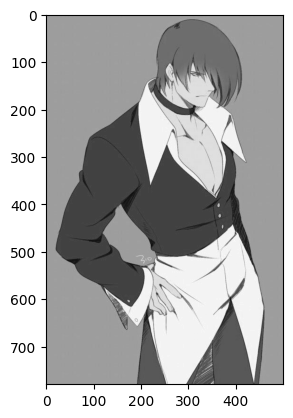

In [65]:
imgIY = plt.imread('IoriYagami.jpg')
red = imgIY[:,:,0]
green = imgIY[:,:,1]
blue = imgIY[:,:,2]
grayIY = 1/3 * red + 1/3 * green + 1/3 * blue
plt.imshow(grayIY, cmap='gray')

### Membuat Fungsi Normalisasi

In [66]:
def normalisasi(img):
    imgNormalisasi = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imgNormalisasi

Fungsi 'normalisasi' digunakan untuk menghasilkan gambar yang dinormalisasi dengan nilai piksel dalam rentang antara 0 dan 1 dengan mengambil gambar sebagai inputan. Kemudian, menghitungnya dengan mengurangkan nilai minimum piksel dari gambar dan membaginya dengan selisih nilai maksimum dan minimum piksel dalam gambar.

### Membuat Fungsi Dekomposisi

In [67]:
def dekomposisi(grayIY, lowPassFilter, highPassFilter):
    if grayIY.shape[0] % 2 != 0:
        grayIY = grayIY[:-1, :]
    if grayIY.shape[1] % 2 != 0:
        grayIY = grayIY[:, :-1]

    newl = np.zeros((grayIY.shape[0], grayIY.shape[1]//2), dtype=float)
    newh = np.zeros((grayIY.shape[0], grayIY.shape[1]//2), dtype=float)
    newll = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newlh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhl = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    
    for i in range(0, grayIY.shape[0], 1):
        for j in range(0, grayIY.shape[1], 2):
            newl[i, j//2] = (grayIY[i, j]*lowPassFilter[0]+grayIY[i, j+1]*lowPassFilter[1])/2
            newh[i, j//2] = (grayIY[i, j]*highPassFilter[0]+grayIY[i, j+1]*highPassFilter[1])/2

    for i in range(0, newl.shape[0], 2):
        for j in range(0, newl.shape[1], 1):
            newll[i//2, j] = (newl[i, j]*lowPassFilter[0]+newl[i+1, j]*lowPassFilter[1])/2
            newlh[i//2, j] = (newl[i, j]*highPassFilter[0]+newl[i+1, j]*highPassFilter[1])/2
            newhl[i//2, j] = (newh[i, j]*lowPassFilter[0]+newh[i+1, j]*lowPassFilter[1])/2
            newhh[i//2, j] = (newh[i, j]*highPassFilter[0]+newh[i+1, j]*highPassFilter[1])/2
    
    return newll, newlh, newhl, newhh

Fungsi 'dekomposisi' melakukan proses pengkondisian untuk memastikan dimensi baris dan kolomnya genap. Setelah itu, gambar dibagi menjadi sub-blok dan konvolusi dilakukan dengan filter rendah dan tinggi, sehingga menghasilkan koefisien LL, LH, HL, dan HH.

### Membuat Fungsi Kombinasi Transformasi Wavelet

In [68]:
def combined_wavelet_img(newll, newlh, newhl, newhh):
    (height, width) = newll.shape[:2]
    result = np.zeros((height*2, width*2))
    for i in range(height):
        for j in range(width):
            result[i,j] = newll[i,j]
            result[i+height, j] = newhl[i, j]
            result[i, j+width] = newlh[i, j]
            result[i+height, j+width] = newhh[i, j]
    
    return result


Fungsi 'combined_wavelet_img' digunakan untuk menyusun matriks koefisien sub-band ke dalam gambar hasil, dimana setiap koefisien sub-band diposisikan sesuai dengan kuadran yang sesuai dalam gambar hasil.

### Mendefinisikan Low Pass Filter dan High Pass Filter

In [69]:
LPF = np.array([0.7, 0.7])
HPF = np.array([-0.7, 0.7])

Baris kode di atas merupakan inisialisasi filter rendah dengan koefisien [0.7, 0.7] dan filter tinggi dengan koefisien [-0.7, 0.7]. Nilai ini digunakan dalam transformasi wavelet untuk mengekstraksi frekuensi rendah dan tinggi dari sinyal.

### Melakukan Proses Dekomposisi dan Menormalisasi Hasil Dekomposisi

In [70]:
ll, lh, hl, hh = dekomposisi(grayIY, LPF, HPF)
LL = normalisasi(ll)
LH = normalisasi(lh)
HL = normalisasi(hl)
HH = normalisasi(hh)

Baris kode di atas digunakan untuk melakukan transformasi wavelet terhadap gambar grayscale menggunakan filter rendah dan filter tinggi. Proses ini menghasilkan empat bagian yaitu 'LL', 'LH', 'HL', dan 'HH'. Setelah itu, setiap bagian dinormalisasi menggunakan fungsi 'normalisasi'.

### Melakukan Proses Dekomposisi dan Menampilkan Citra Hasil Dekomposisi Setelah Normalisasi dan Kombinasi Transform Wavelet

'wavelet_img' merupakan hasil dari proses fungsi 'combined_wavelet_img'. Setelah itu, menampilkan visualisasi hasil transformasi wavelet dalam 5 subplot yang berbeda. Subplot pertama menampilkan bagian LL (Approximation), subplot kedua menampilkan bagian LH (Horizontal Details), subplot ketiga menampilkan bagian HL (Vertical Details), subplot keempat menampilkan bagian HH (Diagonal Details), dan subplot kelima menampilkan gabungan dari keempat bagian tersebut.

(-0.5, 499.5, 779.5, -0.5)

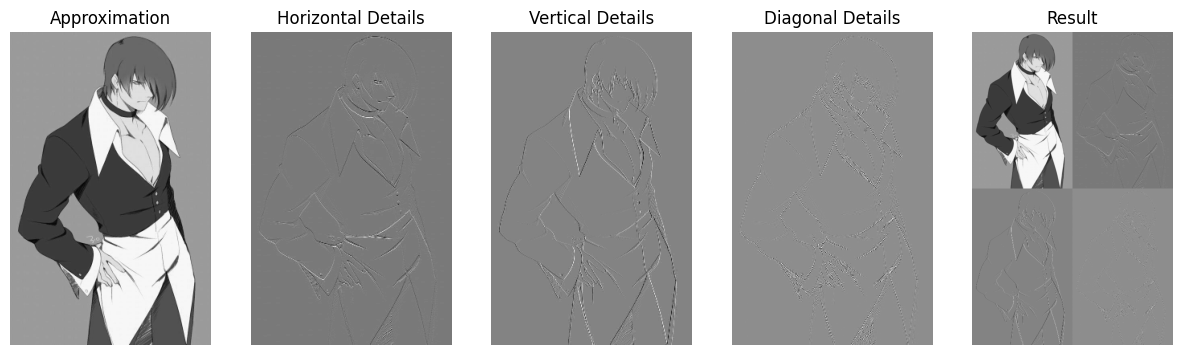

In [71]:
wavelet_img = combined_wavelet_img(LL, LH, HL, HH)
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('Approximation')
plt.imshow(LL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('Horizontal Details')
plt.imshow(LH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('Vertical Details')
plt.imshow(HL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('Diagonal Details')
plt.imshow(HH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('Result')
plt.imshow(wavelet_img, cmap='gray')
plt.axis('off')

### Membuat Fungsi Dilatasi

In [72]:
def dilatasi(skala, img):
    height, width = img.shape
    Dilatasi = np.zeros((height*skala, width*skala))
    n = 0
    for i in range(height*skala):
        m = 0
        for j in range(width*skala):
            Dilatasi[i][j] = img[n][m]
            if j % skala == skala-1:
                m += 1
        if i % skala == skala-1:
            n += 1
    return Dilatasi

Fungsi 'dilatasi' digunakan untuk mengubah ukuran gambar menjadi lebih besar dari citra aslinya dengan memperbesar setiap piksel sesuai dengan faktor skala yang diberikan.

### Membuat Fungsi Gabungan Kombinasi

In [73]:
def merge_combined(lL, lH, hL, hH, levels):
    result = combined_wavelet_img(lL, lH, hL, hH)
    for i in range(levels-1):
        lH = dilatasi(2, lH)
        hL = dilatasi(2, hL)
        hH = dilatasi(2, hH)
               
        if i >= 1:
            result = combined_wavelet_img(result, lH, hL, hH)
        else:
            result = combined_wavelet_img(result, lH, hL, hH)

    return result

Fungsi 'merge_combined' digunakan untuk menggabungkan kembali bagian hasil transformasi wavelet setelah dilakukan operasi dilatasi pada beberapa level.

### Melakukan Proses Dekomposisi, Normalisasi, Gabung Kombinasi dan Menampilkan Citra Hasilnya

Dekomposisi melakukan transformasi wavelet pada citra grayscale menggunakan filter rendah dan filter tinggi. Setelah itu, bagian hasil transformasi tersebut dinormalisasi menggunakan fungsi 'normalisasi' . Kemudian, dilakukan penggabungan kembali bagian-bagian tersebut dengan pemanggilan fungsi 'merge_combined' dengan 'levels' yang ditentukan sebesar 4. Hasil akhir dari proses ini ditampilkan dalam sebuah citra menggunakan 'plt.imshow' dengan skala warna abu-abu.

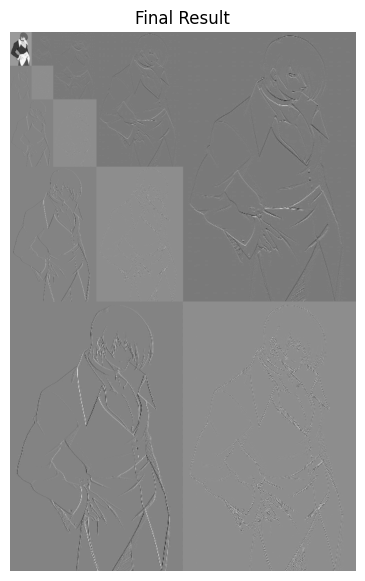

In [74]:
newLL, newLH, newHL, newHH = dekomposisi(grayIY, LPF, HPF)
newLL = normalisasi(newLL)
newLH = normalisasi(newLH)
newHL = normalisasi(newHL)
newHH = normalisasi(newHH)
hasil = merge_combined(newLL, newLH, newHL, newHH, 4)
fig = plt.figure(figsize=(10, 7))
plt.title('Final Result')
plt.axis('off')
plt.imshow(hasil, cmap='gray')

### Membuat Fungsi Rekonstruksi

In [75]:
def rekonstruksi(newll, newlh, newhl, newhh):
    height, width = newll.shape
    h = height*2
    w = width*2
    img = np.zeros([h, w])
    ll = dilatasi(2, newll)
    lh = dilatasi(2, newlh)
    hl = dilatasi(2, newhl)
    hh = dilatasi(2, newhh)
    for i in range(h):
        for j in range(w):
            img[i][j] += (ll[i][j]+lh[i][j]+hl[i][j]+hh[i][j])
    return img

Fungsi 'rekonstruksi' melakukan dilatasi pada masing-masing bagian. Setelah itu, citra asli direkonstruksi dengan menjumlahkan setiap piksel pada posisi yang sesuai dari keempat bagian tersebut.

### Melakukan Proses Rekonstruksi dan Menampilkan Citra Hasil Rekonstruksi

Dengan menggunakan fungsi 'rekonstruksi', gambar Iori Yagami direkonstruksi dari bagian-bagian hasil transformasi wavelet yang telah diambil sebelumnya. Hasil rekonstruksi tersebut kemudian ditampilkan menggunakan plt.imshow dalam skala warna abu-abu. 

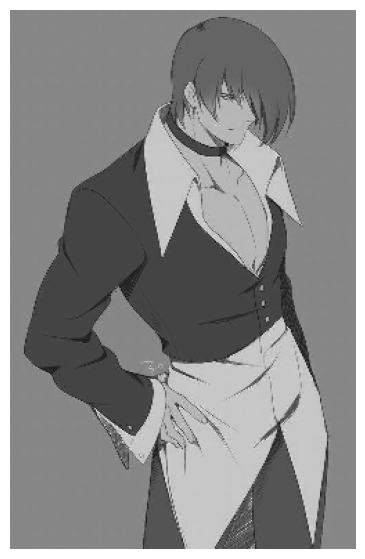

In [76]:
rekonstruksi_IY = rekonstruksi(newLL, newLH, newHL, newHH)
fig = plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(rekonstruksi_IY, cmap='gray')

### Melakukan Proses Dekomposisi dan Menampilkan Citra Hasil Dekomposisi

'BaruLL', 'BaruLH', 'BaruHL', dan 'BaruHH' menyimpan level 1 masing-masing bagian dekomposisi citra. Setelah itu, dilakukan iterasi transformasi wavelet pada komponen LL (BaruLL) sebanyak lima kali. Pada setiap iterasi, dilakukan transformasi wavelet baru menggunakan filter rendah dan filter tinggi. Setelah iterasi selesai, hasil transformasi pada setiap level ditampilkan dalam empat subplot yang berbeda. Subplot pertama menampilkan komponen LL (Approximation), subplot kedua menampilkan komponen LH (Horizontal Details), subplot ketiga menampilkan komponen HL (Vertical Details), dan subplot keempat menampilkan komponen HH (Diagonal Details). Setiap subplot dilengkapi dengan judul yang sesuai dan menggunakan skala warna abu-abu.

(-0.5, 6.5, 11.5, -0.5)

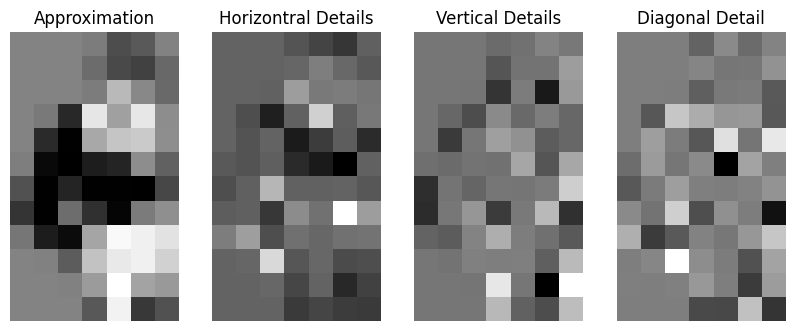

In [77]:
BaruLL = newLL
BaruLH = newLH
BaruHL = newHL
BaruHH = newHH
for i in range(5):
    BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(BaruLL, LPF, HPF)
    
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(BaruLL, cmap='gray')
plt.title("Approximation")
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.imshow(BaruLH, cmap='gray')
plt.title("Horizontral Details")
plt.axis('off')
fig.add_subplot(1, 4, 3)
plt.imshow(BaruHL, cmap='gray')
plt.title("Vertical Details")
plt.axis('off')
fig.add_subplot(1, 4, 4)
plt.imshow(BaruHH, cmap='gray')
plt.title("Diagonal Detail")
plt.axis('off')

Pada level berapa hasil dari dekomposisi berikut? berikan alasannya!

Hasil dari dekomposisi tersebut berada pada Level 6, karena telah dilakukan ujicoba pada level 1, level 2, level 3, level 4, level 5, level 6, level 7 sehingga hasil yang sesuai dengan dekomposisi tersebut yaitu pada level 6. Selain itu juga, pada level 6 memberikan keseimbangan yang baik antara tingkat resolusi yang tinggi dan kompleksitas komputasi yang masih dapat diterima. Dengan meningkatnya tingkat dekomposisi, resolusi sinyal akan meningkat secara signifikan. Level 6 sering dianggap mendapatkan representasi yang cukup detail tanpa terlalu membebani sumber daya komputasi.

### Membuat Fungsi Amplitudo

In [78]:
def amplitudo(img):
    height, width = img.shape
    result = np.zeros((height*width))
    n = 0
    for i in range(height):
        for j in range(width):
            result[n] = img[i][j]
            n+=1
    return result

Fungsi 'amplitudo' melakukan proses konversi matriks gambar ke dalam satu dimensi, dan kemudian menyalin nilai piksel dari setiap posisi ke dalam array yang baru.

### Membuat Fungsi Plot

In [79]:
def plot(title, img, warna):
    height, width = img.shape
    plt.plot([j for j in range (0, height*width)], amplitudo(img), color = warna)
    plt.xlabel('Indeks')
    plt.ylabel('Amplitudo')
    plt.title(title)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.show()

Fungsi 'plot' digunakan untuk memplot amplitudo gambar sebagai fungsi dari indeks pikselnya, sehingga dapat embantu dalam menganalisis distribusi amplitudo di seluruh gambar. Fungsi ini menerima tiga argumen, yaitu 'title' untuk judul plot, 'img' yang merupakan gambar yang akan dianalisis, dan 'warna' yang menentukan warna garis plot. Plot ini memiliki sumbu x yang menunjukkan indeks piksel dan sumbu y yang menunjukkan amplitudo piksel

### Melakukan Proses Plot

Dilakukan pemanggilan fungsi 'plot' sebanyak 4 kali, sehingga menghasilkan 4 plot. Masing-masing plot akan menampilkan amplitudo dari komponen transformasi wavelet yang sesuai. Plot 'Approximation' akan ditampilkan dengan garis biru, 'Horizontal' dengan garis merah, 'Vertical' dengan garis hijau, dan 'Diagonal' dengan garis abu-abu. 

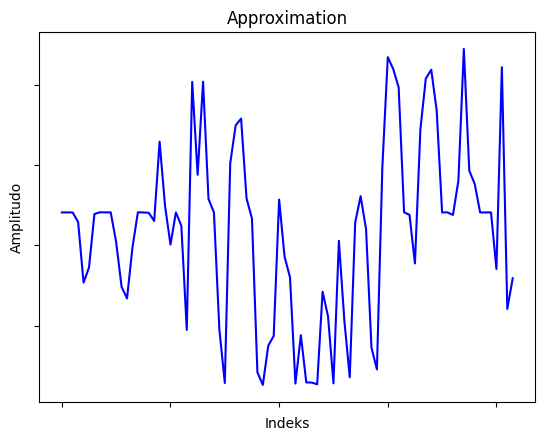

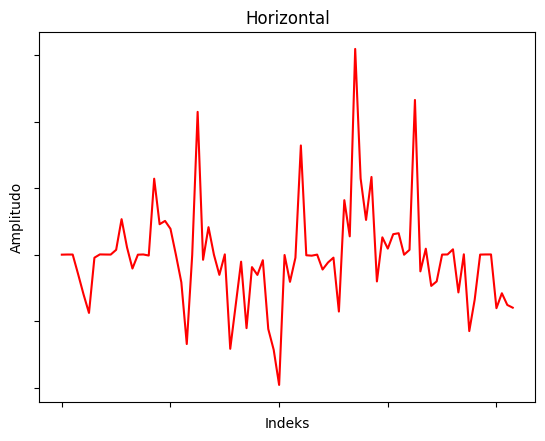

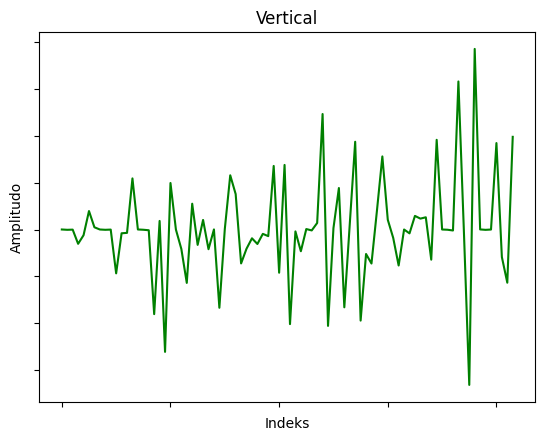

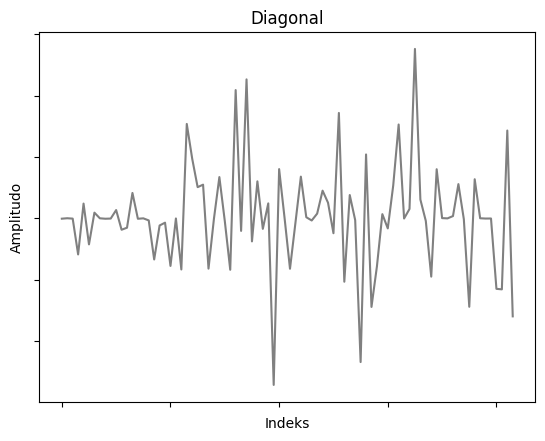

In [80]:
plot('Approximation', BaruLL, 'blue')
plot('Horizontal', BaruLH, 'red')
plot('Vertical', BaruHL, 'green')
plot('Diagonal', BaruHH, 'gray')